In [16]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
Naz_game = pd.read_csv("Games 1 through 4.xlsx - Nazareth.csv")

In [7]:
Naz_full = Naz_game[Naz_game['Split Name']== 'all']

In [8]:
Naz_full

,Session Title,Player Name,Minutes Played,Split Name,Tags,Distance (miles),Sprint Distance (yards),Power Plays,Energy (kcal),Impacts,...,Accelerations Zone Count: 0 - 1 m/s/s,Accelerations Zone Count: 1 - 2 m/s/s,Accelerations Zone Count: 2 - 3 m/s/s,Accelerations Zone Count: 3 - 4 m/s/s,Accelerations Zone Count: > 4 m/s/s,Deceleration Zone Count: 0 - 1 m/s/s,Deceleration Zone Count: 1 - 2 m/s/s,Deceleration Zone Count: 2 - 3 m/s/s,Deceleration Zone Count: 3 - 4 m/s/s,Deceleration Zone Count: > 4 m/s/s
0,Nazareth,C,62.0,all,game,5.2503,129.7831,34,922.2980,4,...,0,269,124,25,9,0,245,109,35,14
1,Nazareth,M,79.0,all,game,5.6184,667.1765,39,869.2240,0,...,0,218,94,33,5,0,179,96,44,16
2,Nazareth,B,20.0,all,game,1.7569,174.3597,17,303.9690,0,...,0,60,33,10,4,0,57,31,12,8
3,Nazareth,S,90.0,all,game,6.2247,397.5819,41,1128.6905,3,...,0,240,118,35,11,0,184,144,54,19
4,Nazareth,R,84.0,all,game,6.0102,376.5573,31,988.0394,2,...,0,250,96,20,2,0,207,95,37,20
5,Nazareth,O,34.0,all,game,3.0907,419.3502,33,451.2664,1,...,0,104,73,32,5,0,100,67,27,16
6,Nazareth,J,50.0,all,game,2.0858,43.3015,21,397.8758,0,...,0,81,41,13,2,0,52,44,14,10
7,Nazareth,G,61.0,all,game,4.5377,408.7138,45,746.3461,1,...,0,155,90,26,5,0,132,84,32,9
8,Nazareth,H,33.0,all,game,2.5994,138.7911,17,409.4220,0,...,0,110,36,10,1,0,82,37,17,11
9,Nazareth,E,8.0,all,game,0.8536,9.5232,3,161.6707,0,...,0,33,16,7,0,0,37,13,5,2


In [9]:
Naz_volume_intensity = Naz_full[["Player Name", "Minutes Played", "Distance (miles)", "Sprint Distance (yards)", "Power Plays", "Energy (kcal)", "Impacts", "Top Speed (mph)","Distance Per Min (yd/min)", "Power Score (w/kg)", "Player Load", "Work Ratio"]]

In [10]:
Naz_cluster = Naz_volume_intensity.loc[:, Naz_volume_intensity.columns != 'Player Name']

In [11]:
Naz_distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(Naz_cluster)
    Naz_distortions.append(kmeanModel.inertia_)

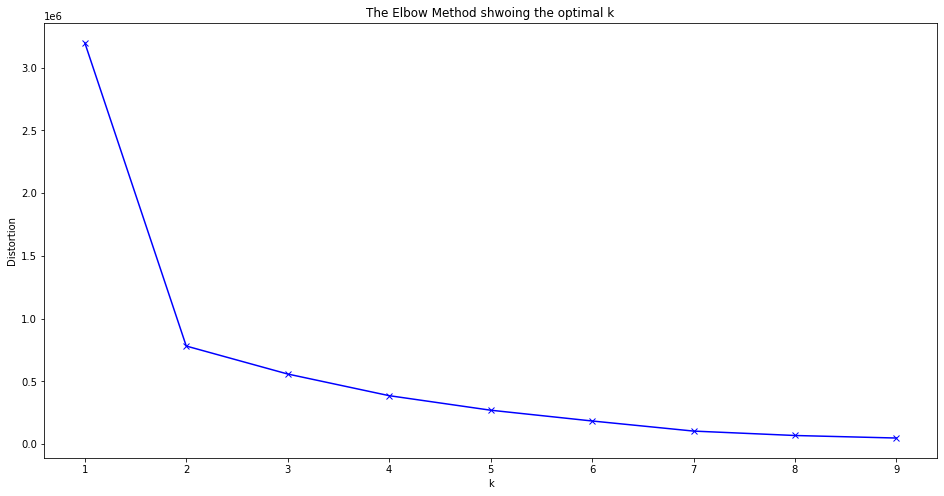

In [13]:
plt.figure(figsize=(16,8))
plt.plot(K, Naz_distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method shwoing the optimal k')
plt.show()

In [14]:
x_Naz = Naz_cluster.values # numpy array
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x_Naz)
X_norm = pd.DataFrame(x_scaled)

In [20]:
pca_Naz = PCA(n_components = 2) # 2D PCA for the plot
reduced_Naz = pd.DataFrame(pca_Naz.fit_transform(X_norm))

In [21]:
# specify the number of clusters
kmeans = KMeans(n_clusters=3)
# fit the input data
kmeans = kmeans.fit(reduced_Naz)
# get the cluster labels
labels = kmeans.predict(reduced_Naz)
# centroid values
centroid = kmeans.cluster_centers_
# cluster values
clusters = kmeans.labels_.tolist()
# adding names
Naz_names = Naz_full['Player Name']

In [22]:
reduced_Naz['cluster'] = clusters
reduced_Naz['names'] = Naz_names
reduced_Naz.columns = ['x', 'y', 'cluster', 'names']
reduced_Naz.head()

,x,y,cluster,names
0,0.907598,0.668950,1,C
1,1.118064,-0.550653,1,M
2,-0.856077,-0.289564,2,B
3,1.481417,0.188812,1,S
4,1.187965,0.118106,1,R


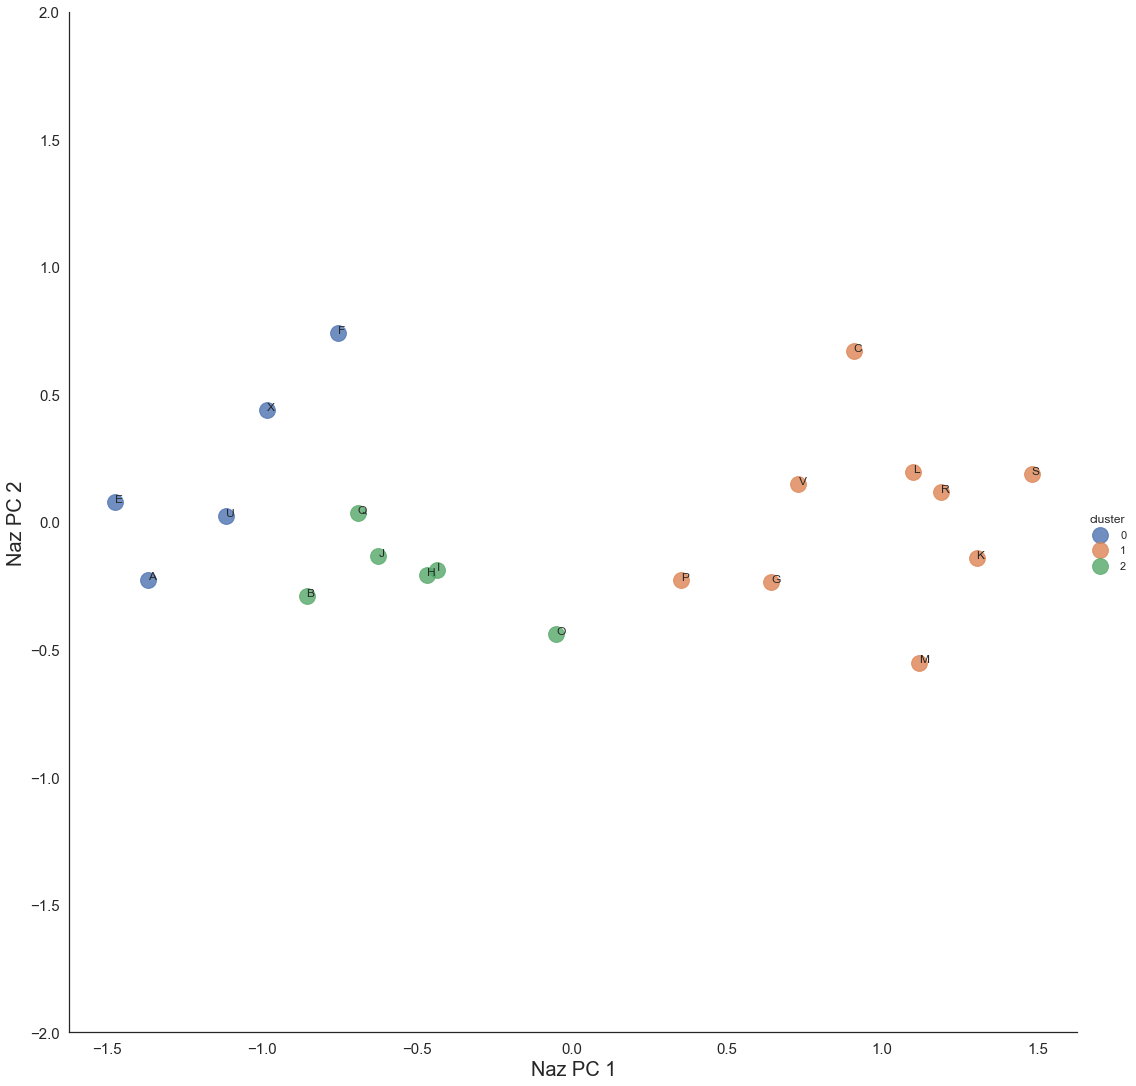

In [24]:
%matplotlib inline
sns.set(style="white")
ax = sns.lmplot(x="x", y="y", hue='cluster', data = reduced_Naz, legend= True,
fit_reg=False, height = 15, scatter_kws={"s": 250})
texts = []
for x, y, s in zip(reduced_Naz.x, reduced_Naz.y, reduced_Naz.names):
    texts.append(plt.text(x, y, s))
ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("Naz PC 1", fontsize = 20)
plt.ylabel("Naz PC 2", fontsize = 20)
plt.show()

In [25]:
Group_1 = reduced_Naz[(reduced_Naz['cluster'] == 0)]
Group_1
# Positions: E(MF) F(GK) X(GK) U(MF) A(DF)

,x,y,cluster,names
9,-1.473041,0.078327,0,E
10,-0.754157,0.741674,0,F
14,-0.984306,0.439339,0,X
15,-1.114704,0.024749,0,U
19,-1.366083,-0.225386,0,A


In [26]:
Group_2 = reduced_Naz[(reduced_Naz['cluster'] == 1)]
Group_2
# Positions: C(MF) M(D) S(MF) R(D) G(F) K(D) V(MF) L(D) P(F)

,x,y,cluster,names
0,0.907598,0.668950,1,C
1,1.118064,-0.550653,1,M
3,1.481417,0.188812,1,S
4,1.187965,0.118106,1,R
7,0.641435,-0.235913,1,G
12,1.304194,-0.142070,1,K
13,0.729976,0.149343,1,V
17,1.098028,0.194915,1,L
18,0.352052,-0.226414,1,P


In [27]:
Group_3 = reduced_Naz[(reduced_Naz['cluster'] == 2)]
Group_3
# Positions: B(F) O(F) J(F) H(F) Q(MF) I(F)

,x,y,cluster,names
2,-0.856077,-0.289564,2,B
5,-0.051574,-0.440696,2,O
6,-0.624999,-0.133762,2,J
8,-0.468541,-0.207393,2,H
11,-0.691470,0.035747,2,Q
16,-0.435778,-0.188112,2,I
